In [ ]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt


In [ ]:
%matplotlib inline

In [3]:
#Ler os Arquivos da planil;ha da Abbot e a lista com os Ids dos pacientes diabéticos
#Read Abbot Spreadsheet Files and Diabetes Patient ID List

In [4]:
df = pd.read_csv("planilha.csv", low_memory=False)
df_diabeticos =pd.read_excel("diabeticos.xls")

In [5]:
#Pegamos a coluna com os Ids da planilha dos diabeticos e a transformamos em uma lista(str) de Ids. Achamamos de l a usaremos depois

In [6]:
df_dm = df_diabeticos[['prontuário']]
l = list(df_dm.prontuário.astype('str'))

In [7]:
#Criamos aqui um DataFrame somente com as colunas que desejamos e renomeamos as colunas
#We create a DataFrame here with just the columns we want and rename the columns

In [8]:
df = df[['Patient ID', 'Test Date/Time', 'GLU','Excluded']]
df.columns = ['id', 'date', 'glucose', 'excluded']

In [9]:
#Excluimos as linhas onde 'excluded'='No'
#We exclude lines where 'excluded' = 'No

In [10]:
df = df[df['excluded']=='No']

In [11]:
df = df.drop('excluded',axis=1)

In [12]:
#As celulas onde 'glucose>500'sao trocadas por 500 e '<20'por 20

In [13]:
#df[df['glucose']=='>500'] = "500"

i = df[df['glucose']=='>500'].index
df.loc[i,'glucose']="500"

#df[df['glucose']=='<20'] = "20"
i = df[df['glucose']=='<20'].index
df.loc[i,'glucose'] = "20"

df = df


In [14]:
#Fazemos um slice da string 'date' dos 10 primeiros digitos


In [15]:
df['date'] = df.date.str.slice(0,10)


In [16]:
#Transformamos o object date em datetime64 com formato d/m/yyyy
#Transformamos o objeto glucose em integer64
#Adicionamos ass colunas 'day', 'month' e 'year' com os respectivos dia, mes e ano da coluna 'date'

In [17]:
df['id'] = df.id.astype('str')
df['date']= pd.to_datetime(df['date'],format = '%d/%m/%Y')
df['glucose'] = df.glucose.astype('float64')
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
#df.dtypes

In [18]:
#Criamos uma coluna boleana no DataFrame 'df' chamada 'diabetico?' e percorremos a lista de 'Id's de diabetico para definir se o paciente em questao é ou nao é diabético

In [19]:
df['diabetico?'] = list(map(lambda x : x in l , df['id']))

In [20]:
#Filtramos a lista para somente pacientes diabéticos
#Atualizamos DataFrame 'df'

In [21]:
#Selecionamos as colunas 'year', 'month', 'day', 'glucose'

In [22]:
df2 =df[['year','month','day','id','glucose','diabetico?']]

In [23]:
#Retiramos todos os registros onde 'id' é vazio
#Retiramos todos os registros onde 'id' nao é um valos numérico

In [24]:
df3=df2.dropna()
df_final = df3[df3['id'].str.isnumeric()]


In [28]:
def analisar(df_final):
    df_final = df_final[['year', 'month', 'day','id', 'glucose']]
    
    df_hipoglicemia = df_final[(df_final['glucose']<=70) & (df_final['glucose']>40)]
    df_hipoglicemia_grave = df_final[df_final['glucose']<=40]
    df_hiperglicemia = df_final[(df_final['glucose']>=180) & (df_final['glucose']<300)]
    df_hiperglicemia_grave = df_final[df_final['glucose']>=300]
    
    grouped = df_final.groupby(['year', 'month','day','id']).count()
    g= grouped.groupby(['year','month','day']).count()
#g.columns= ['y','m','d','patient_days']
    patient_days_total = g.groupby(['year','month']).sum()
    
    grouped = df_hipoglicemia.groupby(['year', 'month','day','id']).count()
    g= grouped.groupby(['year','month','day']).count()
#g.columns= ['y','m','d','patient_days']
    patient_days_hipo = g.groupby(['year','month']).sum()
    
    grouped = df_hiperglicemia.groupby(['year', 'month','day','id']).count()
    g= grouped.groupby(['year','month','day']).count()
#g.columns= ['y','m','d','patient_days']
    patient_days_hiper = g.groupby(['year','month']).sum()
    
    grouped = df_hiperglicemia_grave.groupby(['year', 'month','day','id']).count()
    g= grouped.groupby(['year','month','day']).count()
#g.columns= ['y','m','d','patient_days']
    patient_days_hiper_grave = g.groupby(['year','month']).sum()
    
    grouped = df_hipoglicemia_grave.groupby(['year', 'month','day','id']).count()
    g= grouped.groupby(['year','month','day']).count()
#g.columns= ['y','m','d','patient_days']
    patient_days_hipo_grave = g.groupby(['year','month']).sum()
    
    frequencia_hipo_grave = patient_days_hipo_grave['glucose']/patient_days_total['glucose']*100
    frequencia_hipo = patient_days_hipo['glucose']/ patient_days_total['glucose']*100
    frequencia_hiper = patient_days_hiper['glucose']/patient_days_total['glucose']*100
    frequencia_hiper_grave = patient_days_hiper_grave['glucose']/patient_days_total['glucose']*100
    
    frequencia_hipo_grave = frequencia_hipo_grave.reset_index()
    frequencia_hipo_grave = frequencia_hipo_grave.rename(columns={'glucose':'%'})
    
    
    frequencia_hipo = frequencia_hipo.reset_index()
    frequencia_hipo = frequencia_hipo.rename(columns={'glucose':'%'})
    
    
    frequencia_hiper_grave = frequencia_hiper_grave.reset_index()
    frequencia_hiper_grave = frequencia_hiper_grave.rename(columns={'glucose':'%'})
    
    
    frequencia_hiper = frequencia_hiper.reset_index()
    frequencia_hiper = frequencia_hiper.rename(columns={'glucose':'%'})
    
    
    mean_glucose = df_final.groupby(['year', 'month','day']).mean()  
    mean_glucose_month = mean_glucose.groupby(['year','month']).mean()
    mean_glucose_month = mean_glucose_month.reset_index()
    
#export = export.to_csv('export.csv', encoding='utf-8', index=False)
    writer = pd.ExcelWriter('export.xlsx', engine='xlsxwriter')
    frequencia_hiper.to_excel(writer,sheet_name='% de Hiperglicemia')
    frequencia_hiper_grave.to_excel(writer,sheet_name='% de Hiperglicemia grave')
    frequencia_hipo.to_excel(writer,sheet_name='% de Hipoglicemia')
    frequencia_hipo_grave.to_excel(writer,sheet_name='% de Hipoglicemia grave')
    mean_glucose_month.to_excel(writer,sheet_name='Media de glicemias')
    frequencia_hiper.to_excel(writer)
    
    print ()
    print('Media das glicemias')
    print(mean_glucose_month)
    print ()
    print('Frequencia de hiperglicemia (Glicose >=180 e <300mg/dl) em pacientes.dia')
    print (frequencia_hiper)
    print (grafico_percentuais(frequencia_hiper))
    print ()
    print ('Frequencia de hiperglicemia grave (Glicose >=300mg/dl) em pacientes.dia')
    print (frequencia_hiper_grave)
    print (grafico_percentuais(frequencia_hiper_grave))
    print ()
    print ('Frequencia de hipoglicemia (Glicose <=70mg/dl e >40mg/dl) em pacientes.dia')
    print (frequencia_hipo)
    print (grafico_percentuais(frequencia_hipo))
    print ()
    print ('Frequencia de hipoglicemia grave (Glicose <=40mg/dl) em pacientes.dia')
    print (frequencia_hipo_grave)
    print (grafico_percentuais(frequencia_hipo_grave))
    print ()
   
    

Todos os pacientes

Media das glicemias
   year  month     glucose
0  2019      3  143.889114
1  2019      4  146.719751
2  2019      5  145.268175
3  2019      6  149.772292
4  2019      7  144.482217
5  2019      8  145.772706
6  2019      9  144.601006
7  2019     10  144.948187

Frequencia de hiperglicemia (Glicose >=180 e <300mg/dl) em pacientes.dia
   year  month          %
0  2019      3  26.156482
1  2019      4  27.906977
2  2019      5  28.435568
3  2019      6  29.926673
4  2019      7  27.205882
5  2019      8  28.156182
6  2019      9  27.150428
7  2019     10  28.547439
None

Frequencia de hiperglicemia grave (Glicose >=300mg/dl) em pacientes.dia
   year  month         %
0  2019      3  4.283267
1  2019      4  3.573454
2  2019      5  3.661436
3  2019      6  6.691109
4  2019      7  4.319853
5  2019      8  3.644252
6  2019      9  4.402772
7  2019     10  3.820319
None

Frequencia de hipoglicemia (Glicose <=70mg/dl e >40mg/dl) em pacientes.dia
   year  month         %


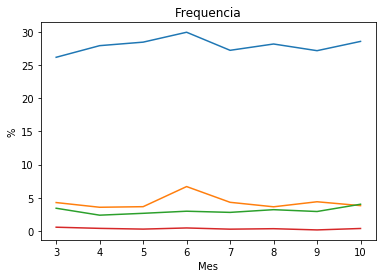

In [29]:
print('Todos os pacientes')
analisar(df_final)

Apenas em pacientes diabeticos


Media das glicemias
   year  month     glucose
0  2019      3  167.138090
1  2019      4  165.055303
2  2019      5  172.232640
3  2019      6  180.795301
4  2019      7  161.739668
5  2019      8  161.211664
6  2019      9  164.994131
7  2019     10  163.287203

Frequencia de hiperglicemia (Glicose >=180 e <300mg/dl) em pacientes.dia
   year  month          %
0  2019      3  53.343239
1  2019      4  48.345324
2  2019      5  56.622114
3  2019      6  58.769634
4  2019      7  46.868687
5  2019      8  45.026178
6  2019      9  45.906164
7  2019     10  50.419287
None

Frequencia de hiperglicemia grave (Glicose >=300mg/dl) em pacientes.dia
   year  month          %
0  2019      3  10.401189
1  2019      4   8.201439
2  2019      5   8.626974
3  2019      6  16.361257
4  2019      7   8.989899
5  2019      8   6.719023
6  2019      9   8.831647
7  2019     10   6.603774
None

Frequencia de hipoglicemia (Glicose <=70mg/dl e >40mg/dl) em pacientes.dia
   

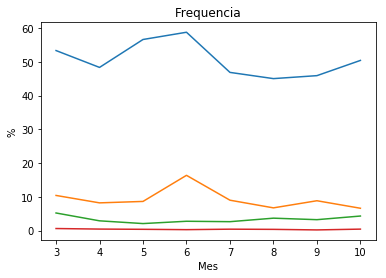

In [30]:
print ('Apenas em pacientes diabeticos')
print()
analisar(df_final[df_final['diabetico?']==True])

In [27]:
def grafico_percentuais(dataFrame):
    x = list(dataFrame['%'])
    y = list(dataFrame['month'])
    plt.plot(y,x,'-')
    plt.xlabel('Mes')
    plt.ylabel('%')
    plt.title('Frequencia')

In [ ]:
#export = frequencia_hiper.to_csv('export.csv', encoding='utf-8', index=False)
                                   

In [ ]:
#frequencia_hipo

In [ ]:
#mean_glucose_month

In [ ]:
#Agora fazemos a media mensal das glicemias, fazendo a media das medias dos dias 

In [ ]:
avarege_glucose_by_month = mean_glucose.groupby(['year','month']).mean()
avarege_glucose_by_month

In [ ]:
list_avarege_glucose= []
for i in range (len(avarege_glucose_by_month)):
    list_avarege_glucose.append((avarege_glucose_by_month.index[i][1],int(np.array(avarege_glucose_by_month)[i])))
   
    
print(list_avarege_glucose)

In [ ]:
x = list(map(lambda x : x[0],list_avarege_glucose))
x

In [ ]:
y = list(map(lambda y : y[1], list_avarege_glucose))
y

In [ ]:
plt.plot(x,y,'r*')


In [ ]:
#PARTE 2
#Calculo da frequencia de hipoglicemia

In [ ]:
#Filtramos todas as glicemias com valores menores que 70

In [ ]:
filter = df[df['glucose']<70]
filter = filter[['id','year','month','day', 'glucose']]

In [ ]:
#Retiramos todas os registros com 'id' nulo

In [ ]:
df_glucose_less_70 = filter.drop(filter[pd.isna(filter['id'])].index,axis=0)
df_glucose_less_70
#df_glucose_less_70.head()

In [ ]:
# Agrupa por ano, mes, dia e id e conta quantos episodios de hipoglicemia cada 'id' teve no dia 

In [ ]:
first_group = df_glucose_less_70.groupby(['year', 'month','day','id']).count()
first_group

In [ ]:
#Como nos interessa apenas o paciente dia, varios episodios de hipoglicemia no mesmo dia sao contabilizados como apenas 1 episodio
#Portanto agrupamos novamente por Ano e Mes e contamos quantos ids existem em cada mes de first_group

In [ ]:
df_num_of_cases_of_hipoglicemia_by_month_in_patient_days = first_group.groupby(['year', 'month']).glucose.count()
numerator = df_num_of_cases_of_hipoglicemia_by_month_in_patient_days
numerator

In [ ]:
#PARTE 3 - Para medir a frequencia de hipoglicemia no mes em paciente-dia, criaremos uma matriz de tuples onde o primeiro valor do tuple é o mes e o segundo será zero.
#O valor zero será substituido pelo valor real caso exista casos de hipoglicemia naquele mes.

In [ ]:
#Construimos a matriz-base

In [ ]:
matriz_base =[]
for i in range(1,13):
    matriz_base.append((i,0))
print(matriz_base)

In [ ]:
n=[]
new_matrix = matriz_base

for i in range(len(numerator)):
    n.append((numerator.index[i][1],numerator[i]))
print(n)
print("-----")
for i in range (0,len(n)):
    for l in range(0,len(new_matrix)):
        if n[i][0] == new_matrix[l][0]:
            new_matrix[l] = n[i]
n = new_matrix

print(n)

In [ ]:
denominator = df.groupby(['year', 'month', 'day','id']).id.count().groupby((['year', 'month'])).count()

In [ ]:
matriz_base

In [ ]:
matriz_base =[]
for i in range(1,13):
    matriz_base.append((i,0))

d=[]
new_matrix = matriz_base
for i in range(len(denominator)):
    d.append((denominator.index[i][1],denominator[i]))   

print(d)
print("-------")
for i in range (0,len(d)):
    for l in range(0,len(matriz_base)):
        if d[i][0] == matriz_base[l][0]:
            new_matrix[l] = d[i]
print (new_matrix)
d = new_matrix


In [ ]:
list_rate_hipoglicemia = []
for i in range(len(d)):
    if d[i][1]==0:
        list_rate_hipoglicemia.append((i+1,None))
    else:
        rate = int(n[i][1])/int(d[i][1])
        print (int(d[i][1]))
        list_rate_hipoglicemia.append((i+1, round(rate,3)))
                                         
print (list_rate_hipoglicemia)
                                         

In [ ]:
#Decompoe o array de tuples onde o primeiro elemento do tuple é x e o segund é y
#Criamos duas listas x e y com os respectivos valores

In [ ]:
x = list(map(lambda data: data[0],array))
x

In [ ]:
y = list(map(lambda data: data[1],array))
y

In [ ]:
plt.plot(x,y,'r*')
plt.xlim(0,12)


In [ ]:
#Parte 4

In [ ]:
list_rate_hipoglicemia

In [ ]:
a =[]

for i in range(len(list_avarege_glucose)):
    for l in range(1,13):
        if(list_avarege_glucose[i][0] == l):
            a.append((l,list_avarege_glucose[i][1]))
        else:
            a.append((l,None))
print (a)
    
    




In [ ]:
x = list(map(lambda x: x[1] ,list_rate_hipoglicemia))
x

In [ ]:
y = list(map(lambda y: y[1], a))
y

In [ ]:
plt.plot(x,y,'r*')

In [ ]:
y = list(map(lambda y: y[1],list_avarege_glucose))
y

In [ ]:
list_avarege_glucose

In [ ]:
plt.plot(x,y,'*')

In [ ]:
rate_hipoglicemia.index(0.1)

In [ ]:
rh = np.array(rate_hipoglicemia)
mg = np.array(mean_glucose)


In [ ]:
x = rh
y = mg

plt.plot(x,y,'*')

In [ ]:
data = np.array(mean_glucose.index)
dias = list(map(lambda x: x[2], data))
print (dias)

limite para hipeglicemia de 10


In [ ]:
x = np.array(list(dias))
y = np.array(mean_glucose['glucose'])


lim = 135
x1 = np.arange(1,31)
y1 = list(map(lambda x: lim, linha_vermelha_x))
yu = y + list(map(lambda x: x.std(),))
yl = y - list(map(lambda x: x.std(),y))


In [ ]:
rate_hipoglicemia = [()]
for i in range(0,len(d)):
    if(int(d[i][l])==0):
        rate_hipoglicemia.append((i,None))
    r = int(n[i][1])/int(d[i][1])
    rate_hipoglicemia.append((round(r,2)))

print(rate_hipoglicemia)

        

In [ ]:
plt.plot(x1,y1,'red')
plt.ylim = ()

plt.plot(x,y,'bo')

print(y1)
plt.xlabel = ('Date')
plt.title = ('Media das glicemias')
y_min = y.min()-10
if y.max()>lim:
    y_max= y.max()
y_max= lim
plt.ylim(y_min,y_max)



In [ ]:
dir(plt)
help(plt.plot)


In [ ]:
dff

In [ ]:
df_glucose_more_180 = dff[dff['glucose']<70]



In [ ]:
df_glucose_more_180

In [ ]:
count_1 = df_glucose_more_180.groupby(['date','id']).count()
count_1

In [ ]:
count_1.groupby(['date']).count()

In [ ]:
#df[['date']]
for i in range(len(df)):
    print (pd.to_datetime(df.loc[i][1][:10]))
    





#pd.to_datetime(df['date'], format='%d/%m/%Y')

#df.dtypes
#df['date'] = pd.to_datetime(df['date'])


In [ ]:
array = np.array(df['date'])
print (array)
for i in range(0,len(array)):
    row = array[i]
    row = row[:10]
    print(i, row)


In [ ]:
show_glucose_greater_then_500(array)

In [ ]:
array = np.array(df)
array

In [ ]:
def delete_glucose_greater_then_500(array):
    
    list_index = np.array([])
    new_array = np.array([])
    
    for r in range(0,len(array)):
        row = array[r]
        if row[2] == '>500':
            #print(row)
            list_index = np.append(list_index,[r])
            #print (list_index)
        
        new_array = np.delete(array,list_index,axis=0)
        
    print(f"Preview lenth of original array:", len(array))
    print(f"New lenth of array:", len(new_array))
        
        
    return new_array



In [ ]:
delete_glucose_greater_then_500(array)

In [ ]:
def delete_glucose_less_then_20(array):
    
    list_index = np.array([])
    new_array = np.array([])
    
    for r in range(0,len(array)):
        row = array[r]
        if row[2] == '<20':
            print(row)
            list_index = np.append(list_index,[r])
            #print (list_index)
        
        new_array = np.delete(array,list_index,axis=0)
        
    print(f"Preview lenth of original array:", len(array))
    print(f"New lenth of array:", len(new_array))
        
        
    return new_array

In [ ]:
delete_glucose_less_then_20(array)

In [ ]:
def show_excluded_field_equal_to_yes(array):
    
    
    for r in range(0,len(array)):
        row = array[r]
        if row[3] == "Yes":
            print(row)
    
                                    

In [ ]:
show_excluded_field_equal_to_yes(array)

In [ ]:
def delete_excluded_field_equal_to_yes(array):
    list_index = np.array([])
    new_array = np.array([])
    
    for r in range(0,len(array)):
        row = array[r]
        if row[3] == 'Yes':
            print(row)
            list_index = np.append(list_index,[r])
            #print (list_index)
        
        new_array = np.delete(array,list_index,axis=0)
        
    print(f"Preview lenth of original array:", len(array))
    print(f"New lenth of array:", len(new_array))
    if pd.isnull(row).any():

    return new_array
    
    
    

In [ ]:
delete_excluded_field_equal_to_yes(array)

In [ ]:
def remove_any_null_from_array(array):
    list_index = np.array([])
    new_array = np.array([])
    
    for r in range(0,len(array)):
        row = array[r]
        if pd.isnull(row).any():
            print(row)
            list_index = np.append(list_index,[r])
            #print (list_index)
        
        new_array = np.delete(array,list_index,axis=0)
        
    print(f"Preview lenth of original array:", len(array))
    print(f"New lenth of array:", len(new_array))
    

    return new_array

In [ ]:
remove_any_null_from_array(array)

In [ ]:
def change_glucose_greater_then_500(array):
    
    new_array = np.array([])
    list_index = np.array([])
    
    for r in range(0,len(array)):
        row = array[r]
        print(r)
        
        if row[2] == '>500':
            list_index = np.append(list_index,[r])
            
            
        new_array = 
        
    return new_array

In [ ]:
change_glucose_greater_then_500(array)

Renomeamos as colunas

In [ ]:
a = np.array(df)
print (len(a))
new_a = remove_any_null_from_array(a)
print (len(new_a))


In [ ]:
#df.columns = ['id','date','glicose']

In [ ]:
change_glucose_greater_then_500(new_a)

Filtra um dataframe com os valores (ainda em str) '>500', pega seus indices e joga num array chamado i


In [ ]:
#i = df[df['glicose'] == '>500'].index
#i

Retira as linhas com os indeces filtrados

In [ ]:
#df = df.drop(i, axis = 0)

Faz a mesma coisa com as glicoses '<20'

In [ ]:
#i = df[df['glicose'] == '<20'].index

In [ ]:
#df = df.drop(i, axis = 0)

Faz a mesma coisa com as glicoses NaN

In [ ]:
df['date'] = df.date.astype('datetime64')
df['glicose'] = df.glicose.astype('float64')

In [ ]:
## df['year'] = df['date'].dt.year
#df['month'] = df['date'].dt.month
#df['day'] = df['date'].dt.day
#df.drop(['date'], axis = 1)

#print(df)



#grouped = df.groupby(['year', 'month', 'day', 'id']).mean()
#grouped

In [ ]:
media_mensal = grouped.groupby(['year','month']).mean()

media_mensal


In [ ]:
#array = np.array([[],[]])


for key, value in dic.items():
    
        diaria = np.array(key)
        #print(diaria)
        media = np.array(value).mean()
        type(diaria)
        
        print(np.array(int(media)))
        
       # row = np.append(diaria,[int_media])
        
    
       
        

In [ ]:
print (array[1])


In [ ]:
#df = df.drop(['Operator Name'], axix = 1)

In [ ]:
#help (pd.to_datetime)

In [ ]:

#f = df[df['day']==19]
#f.groupby(['id']).glucose.mean()


#formate_to_date = datetime.datetime.strptime(str(date),'%d/%m/%Y')

#for i in range(len(df)):
    
   # row = np.array(df.loc[i,:])
    
   # date = row[1][0:10]
   # glucose = row[2]
   # formate_to_date = datetime.datetime.strptime(str(date),'%d/%m/%Y')
   # format_to_float = float(glucose)
   # df.loc[i,'date']=formate_to_date
   # df.loc[i,'glucose']=format_to_float
   # print (row)
    
    #print(format_to_float, formate_to_date)
    

    #row = datetime.datetime.strptime(str(df.loc[i,['date']]),'%d/%m/%Y')
    #print (row)